In [72]:
! pip install torchinfo

In [73]:
import torch
import torchinfo
import torch.nn as nn

In [74]:
class Model(nn.Module):

  def __init__(self,num_features):
    super().__init__()
    self.linear = nn.Linear(num_features,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    x = self.linear(x)
    x = self.sigmoid(x)
    return x

In [75]:
torch.manual_seed(123)

x = torch.rand(10,5)

model = Model(x.shape[1])

model(x) # do not need to call forward, can access directly

tensor([[0.4558],
        [0.4343],
        [0.4316],
        [0.4439],
        [0.4996],
        [0.4898],
        [0.4870],
        [0.4239],
        [0.4653],
        [0.4713]], grad_fn=<SigmoidBackward0>)

In [76]:
model.linear.weight

Parameter containing:
tensor([[ 0.1587,  0.0972,  0.1054,  0.1728, -0.0578]], requires_grad=True)

In [77]:
model.linear.bias

Parameter containing:
tensor([-0.4156], requires_grad=True)

In [78]:
torchinfo.summary(model,input_size=(x.shape[0],x.shape[1]))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 1]                   6
├─Sigmoid: 1-2                           [10, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [79]:
class Model(nn.Module):

  def __init__(self,num_features):
    super().__init__()
    self.linear1 = nn.Linear(num_features,3)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(3,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    x = self.linear1(x)
    x = self.relu(x)
    x = self.linear2(x)
    x = self.sigmoid(x)
    return x

In [80]:
model = Model(x.shape[1])

model(x)

tensor([[0.5887],
        [0.6020],
        [0.5952],
        [0.6136],
        [0.6227],
        [0.6086],
        [0.6541],
        [0.5916],
        [0.6050],
        [0.6276]], grad_fn=<SigmoidBackward0>)

In [81]:
torchinfo.summary(model,input_size=(x.shape[0],x.shape[1]))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [82]:
class Model(nn.Module):

  def __init__(self,num_features):
    super().__init__()

    self.network = nn.Sequential(
        nn.Linear(num_features,3),
        nn.ReLU(),
        nn.Linear(3,1),
        nn.Sigmoid()
    )

  def forward(self,x):
    x = self.network(x)
    return x

In [83]:
model = Model(x.shape[1])

model(x)

tensor([[0.5582],
        [0.5763],
        [0.5620],
        [0.5652],
        [0.5706],
        [0.5628],
        [0.5801],
        [0.5644],
        [0.5641],
        [0.5708]], grad_fn=<SigmoidBackward0>)

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_breast_cancer

In [124]:
# Load the dataset
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Add target column

# Display first 3 rows
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [125]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("target", axis=1), df["target"], test_size=0.2, random_state=42)

In [126]:
print(f'x_train shape : {x_train.shape}')
print(f'x_test shape : {x_test.shape}')

x_train shape : (455, 30)
x_test shape : (114, 30)


In [127]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [128]:
x_train_tensor = torch.tensor(X_train, dtype = torch.float32)
x_test_tensor = torch.tensor(X_test, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train, dtype = torch.float32).reshape(-1,1)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float32).reshape(-1,1)

In [129]:
x_train_tensor.shape

torch.Size([455, 30])

In [130]:
x_train_tensor.dtype

torch.float32

In [131]:
y_train_tensor.dtype

torch.float32

In [132]:
class Model(nn.Module):

  def __init__(self,num_features):
    super().__init__()
    torch.manual_seed(123)
    self.linear = nn.Linear(num_features,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    x = self.linear(x)
    x = self.sigmoid(x)
    return x

In [133]:
def loss_function(y_pred, y):
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)
    loss = -(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred)).mean()
    return loss

In [134]:
model = Model(x_train_tensor.shape[1])
loss_arr = []
epochs = 25
lr = 0.1

for i in range(epochs):
    y_pred = model(x_train_tensor)
    loss = loss_function(y_pred, y_train_tensor)

    loss_arr.append(loss.item())

    # Backpropagation
    loss.backward()

    with torch.no_grad():
        model.linear.weight -= lr * model.linear.weight.grad
        model.linear.bias -= lr * model.linear.bias.grad

    model.linear.weight.grad.zero_()
    model.linear.bias.grad.zero_()

    print(f'Epoch {i+1}, Loss: {loss:.6f}')

Epoch 1, Loss: 0.643381
Epoch 2, Loss: 0.509538
Epoch 3, Loss: 0.432163
Epoch 4, Loss: 0.381895
Epoch 5, Loss: 0.346305
Epoch 6, Loss: 0.319547
Epoch 7, Loss: 0.298535
Epoch 8, Loss: 0.281490
Epoch 9, Loss: 0.267313
Epoch 10, Loss: 0.255283
Epoch 11, Loss: 0.244913
Epoch 12, Loss: 0.235853
Epoch 13, Loss: 0.227853
Epoch 14, Loss: 0.220721
Epoch 15, Loss: 0.214314
Epoch 16, Loss: 0.208518
Epoch 17, Loss: 0.203244
Epoch 18, Loss: 0.198419
Epoch 19, Loss: 0.193984
Epoch 20, Loss: 0.189892
Epoch 21, Loss: 0.186100
Epoch 22, Loss: 0.182576
Epoch 23, Loss: 0.179289
Epoch 24, Loss: 0.176216
Epoch 25, Loss: 0.173334


In [135]:
model.linear.bias

Parameter containing:
tensor([0.2837], requires_grad=True)

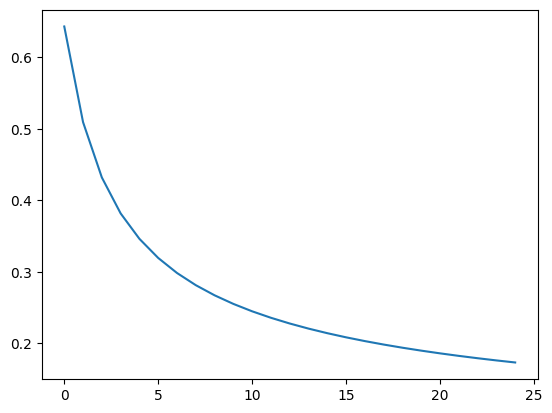

In [136]:
plt.plot(loss_arr)

In [137]:
with torch.no_grad():
  y_pred = model(x_test_tensor)
  y_pred = (y_pred > 0.9).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')

Accuracy: 0.6842105388641357


In [138]:
lossfn = nn.BCELoss()

In [139]:
model = Model(x_train_tensor.shape[1])
loss_arr = []
epochs = 25
lr = 0.1

for i in range(epochs):
    y_pred = model(x_train_tensor)
    loss = lossfn(y_pred, y_train_tensor)

    loss_arr.append(loss.item())

    # Backpropagation
    loss.backward()

    with torch.no_grad():
        model.linear.weight -= lr * model.linear.weight.grad
        model.linear.bias -= lr * model.linear.bias.grad

    model.linear.weight.grad.zero_()
    model.linear.bias.grad.zero_()

    print(f'Epoch {i+1}, Loss: {loss:.6f}')

Epoch 1, Loss: 0.643381
Epoch 2, Loss: 0.509538
Epoch 3, Loss: 0.432163
Epoch 4, Loss: 0.381895
Epoch 5, Loss: 0.346305
Epoch 6, Loss: 0.319547
Epoch 7, Loss: 0.298535
Epoch 8, Loss: 0.281490
Epoch 9, Loss: 0.267313
Epoch 10, Loss: 0.255283
Epoch 11, Loss: 0.244913
Epoch 12, Loss: 0.235853
Epoch 13, Loss: 0.227853
Epoch 14, Loss: 0.220721
Epoch 15, Loss: 0.214314
Epoch 16, Loss: 0.208518
Epoch 17, Loss: 0.203244
Epoch 18, Loss: 0.198419
Epoch 19, Loss: 0.193984
Epoch 20, Loss: 0.189892
Epoch 21, Loss: 0.186100
Epoch 22, Loss: 0.182576
Epoch 23, Loss: 0.179289
Epoch 24, Loss: 0.176216
Epoch 25, Loss: 0.173334


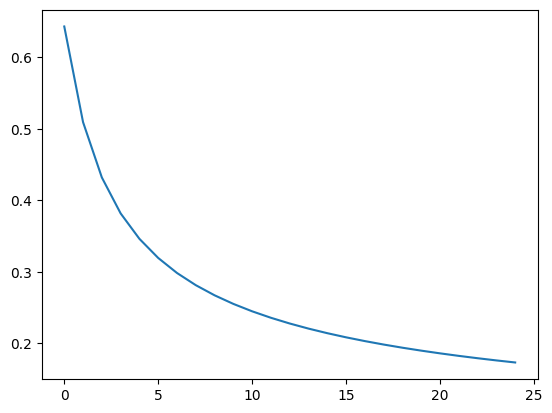

In [140]:
plt.plot(loss_arr)

In [141]:
class Model(nn.Module):

  def __init__(self,num_features):
    super().__init__()
    torch.manual_seed(123)
    self.linear = nn.Linear(num_features,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    x = self.linear(x)
    x = self.sigmoid(x)
    return x

In [142]:
lossfn = nn.BCELoss()

In [149]:
model = Model(x_train_tensor.shape[1])

lr = 0.1
epochs = 25

optimizer = torch.optim.SGD(model.parameters(), lr=lr)


loss_arr = []

for i in range(epochs):

    y_pred = model(x_train_tensor)

    loss = lossfn(y_pred, y_train_tensor)

    loss_arr.append(loss.item())

    optimizer.zero_grad() # good practice to clear gradient first and then backprop

    # Backpropagation
    loss.backward()

    optimizer.step()

    print(f'Epoch {i+1}, Loss: {loss:.6f}')

Epoch 1, Loss: 0.643381
Epoch 2, Loss: 0.509538
Epoch 3, Loss: 0.432163
Epoch 4, Loss: 0.381895
Epoch 5, Loss: 0.346306
Epoch 6, Loss: 0.319547
Epoch 7, Loss: 0.298535
Epoch 8, Loss: 0.281490
Epoch 9, Loss: 0.267313
Epoch 10, Loss: 0.255283
Epoch 11, Loss: 0.244913
Epoch 12, Loss: 0.235853
Epoch 13, Loss: 0.227853
Epoch 14, Loss: 0.220721
Epoch 15, Loss: 0.214314
Epoch 16, Loss: 0.208518
Epoch 17, Loss: 0.203244
Epoch 18, Loss: 0.198419
Epoch 19, Loss: 0.193984
Epoch 20, Loss: 0.189892
Epoch 21, Loss: 0.186100
Epoch 22, Loss: 0.182576
Epoch 23, Loss: 0.179289
Epoch 24, Loss: 0.176216
Epoch 25, Loss: 0.173334


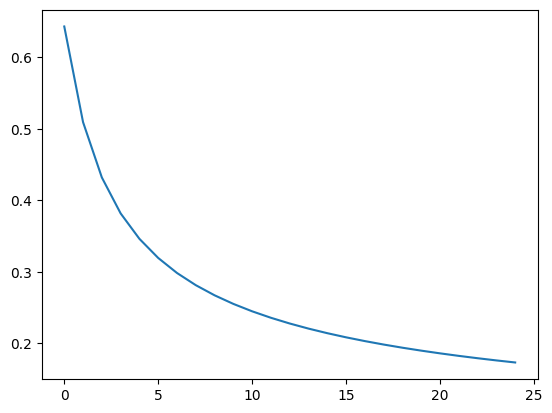

In [150]:
plt.plot(loss_arr)